# Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing data

In [2]:
# Defining the folder path
path = r'/Users/yusufsalk/Documents/Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated_2.pkl'))

In [4]:
# Check the output
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_of_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [5]:
ords_prods_merge.shape

(32404859, 24)

# Creating bar chart

<Axes: >

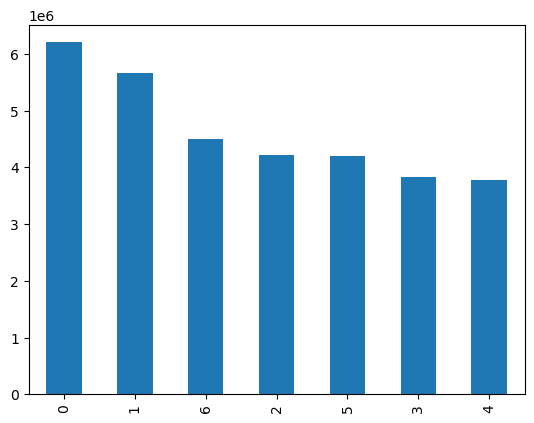

In [7]:
# Create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

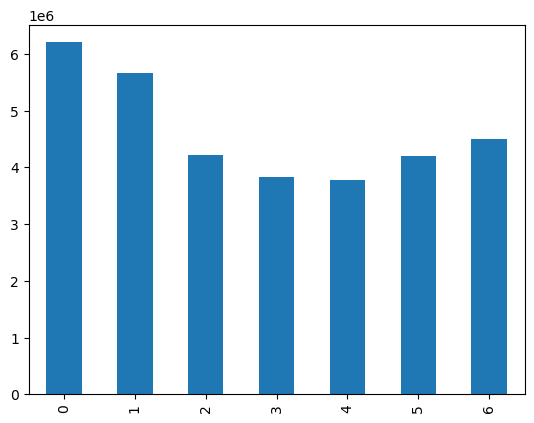

In [8]:
# Sorting the chart according to their index order
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# Sorting the frequency according to their index order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

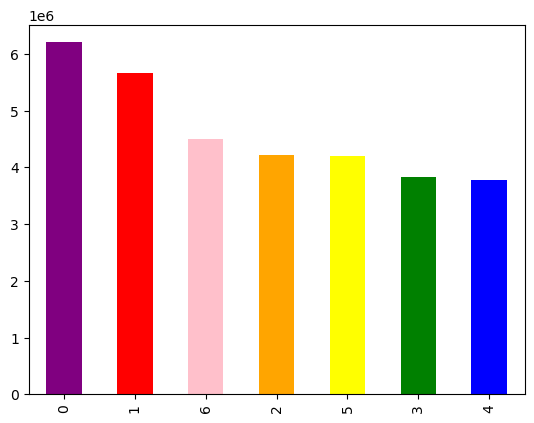

In [10]:
# Changing color in the chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting chart

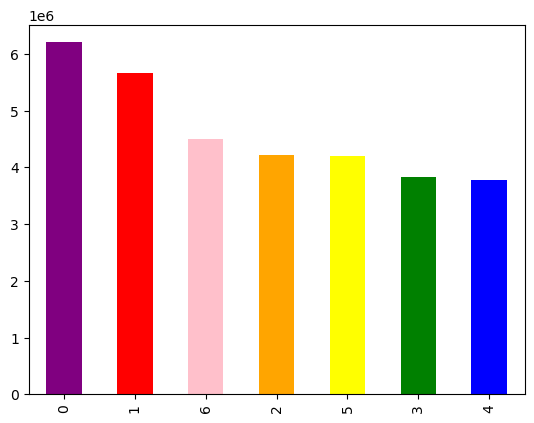

In [11]:
# Calling the chart
bar.figure

In [23]:
# Exporting the chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Creating a histogram

<Axes: ylabel='Frequency'>

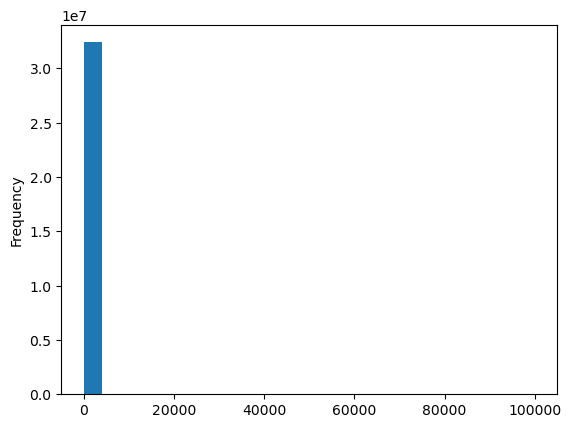

In [13]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
# Looking descriptive statistics for the prices column
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [16]:
ords_prods_merge['prices'].median()

7.4

In [17]:
ords_prods_merge['prices'].max()

99999.0

# Creating a scatterplot

<Axes: xlabel='prices', ylabel='prices'>

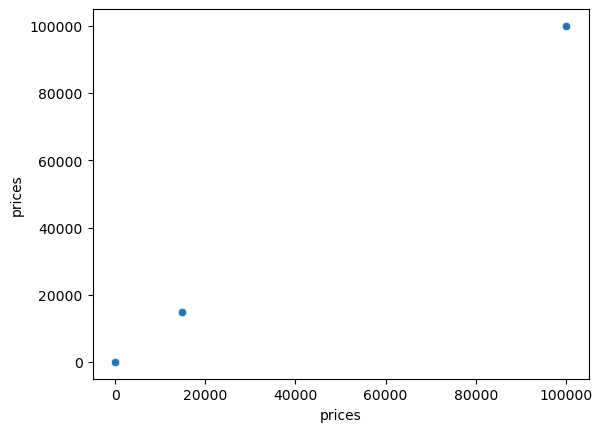

In [18]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [6]:
# Determine values above a certain threshold
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_of_days,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [7]:
# Mark the outliers as missing
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [8]:
# Generate the max-value in the prices column to check whether the replacement was successful
ords_prods_merge['prices'].max()

25.0

## Creating a histogram after data cleaning

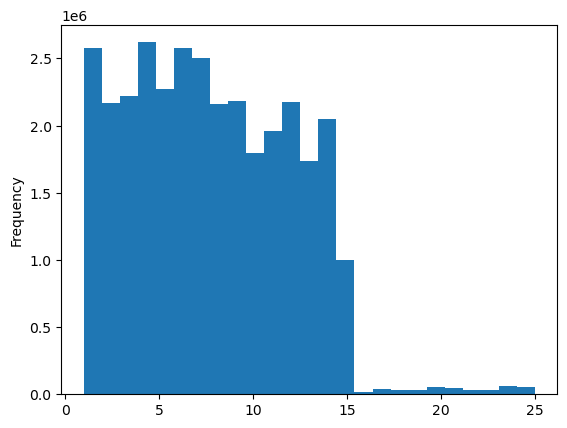

In [22]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

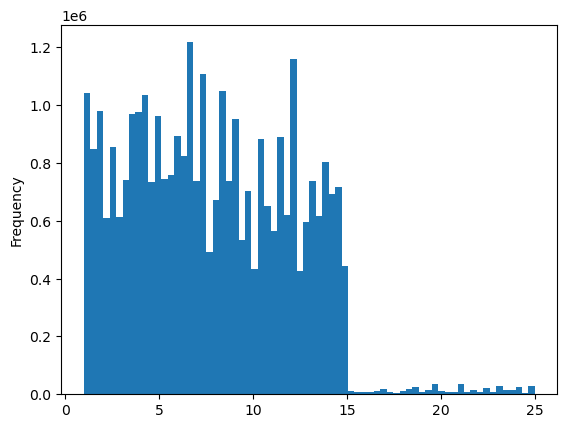

In [24]:
# Increasing the level of granularity in the histogram
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [25]:
# Export the chart
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_prices.png'))

## Creating a scatterplot after data cleaning

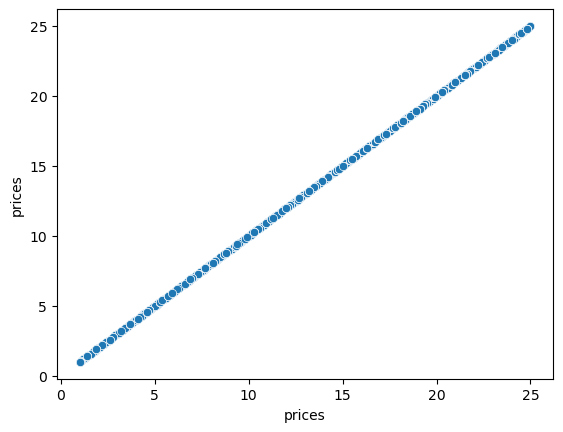

In [10]:
scat_prices = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [11]:
# Export the chart
scat_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_prices.png'))

# Sampling Data

In [29]:
# Creating a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
# np.random.rand() function produces a list of random numbers between 0 and 1
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [32]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [33]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [35]:
# Check the accuracy of results
len(ords_prods_merge)

32404859

In [36]:
len(big) + len(small)

32404859

# Creating a line chart

In [37]:
# Reducing samples to only those columns necessary for the chart
df_2 = small[['orders_day_of_week', 'prices']]

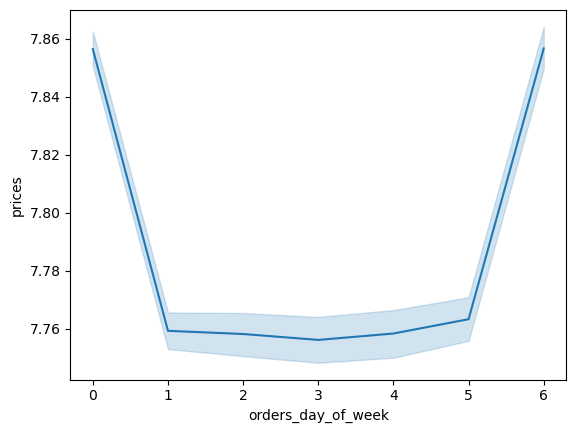

In [38]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [39]:
# Export the chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow_prices.png'))